In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_proteins = pd.read_csv('./train_proteins.csv')
train_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [3]:
train_peptides = pd.read_csv('./train_peptides.csv')
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [4]:
train_clinical_data = pd.read_csv('./train_clinical_data.csv')[['visit_id', 'patient_id', 'visit_month', 'upd23b_clinical_state_on_medication', 'updrs_1', 'updrs_2','updrs_3', 'updrs_4']]
train_clinical_data

,visit_id,patient_id,visit_month,upd23b_clinical_state_on_medication,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,55,0,NaN,10.0,6.0,15.0,NaN
1,55_3,55,3,NaN,10.0,7.0,25.0,NaN
2,55_6,55,6,NaN,8.0,10.0,34.0,NaN
3,55_9,55,9,On,8.0,9.0,30.0,0.0
4,55_12,55,12,On,10.0,10.0,41.0,0.0
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,Off,7.0,6.0,13.0,0.0
2611,65043_54,65043,54,Off,4.0,8.0,11.0,1.0
2612,65043_60,65043,60,Off,6.0,6.0,16.0,1.0
2613,65043_72,65043,72,Off,3.0,9.0,14.0,1.0


In [20]:
patient_groups = train_clinical_data.groupby(by='patient_id').apply(lambda x: x['visit_id'])
patient_groups

patient_id      
55          0           55_0
            1           55_3
            2           55_6
            3           55_9
            4          55_12
                      ...   
65043       2610    65043_48
            2611    65043_54
            2612    65043_60
            2613    65043_72
            2614    65043_84
Name: visit_id, Length: 2615, dtype: object

In [26]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
# targets = ['updrs_4']
mean_updrs = train_clinical_data[targets+['visit_month']].groupby(by='visit_month').mean()
std_updrs = train_clinical_data[targets+['visit_month']].groupby(by='visit_month').std()

In [22]:
df = train_clinical_data[targets+['visit_month']].groupby(by='visit_month').apply(lambda x: x)

<AxesSubplot: xlabel='visit_month', ylabel='updrs_value'>

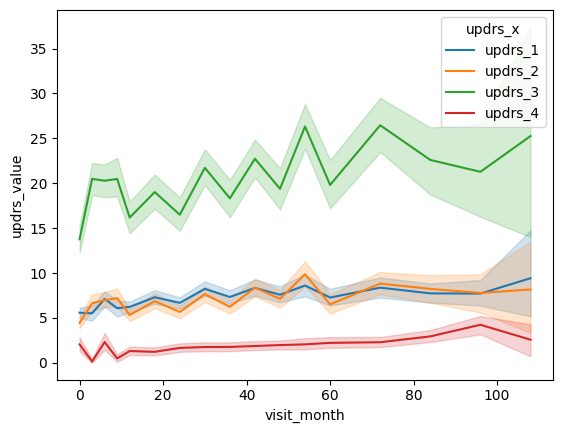

In [27]:
sns.lineplot(x='visit_month', y='updrs_value', hue='updrs_x', data=pd.melt(train_clinical_data, id_vars=['visit_month'], value_vars=targets, var_name='updrs_x', value_name='updrs_value'))

In [24]:
df

,updrs_4,visit_month
0,NaN,0
1,NaN,3
2,NaN,6
3,0.0,9
4,0.0,12
...,...,...
2610,0.0,48
2611,1.0,54
2612,1.0,60
2613,1.0,72


<AxesSubplot: xlabel='visit_month', ylabel='updrs_4'>

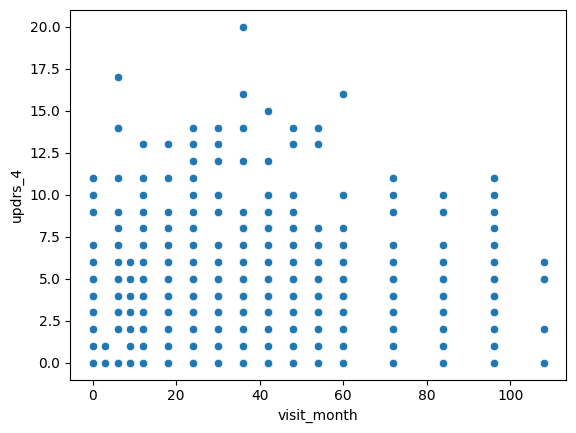

In [25]:
sns.scatterplot(data=df, x='visit_month', y='updrs_4')